In [1]:
#Detekcija ručno pisanih brojeva koristeći MNIST set podataka
# Autor: Lejla Mehinović
#Inspirirano člankom "Image classificasion in 10 minutes" autora Orhan G. Yalçın

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


1


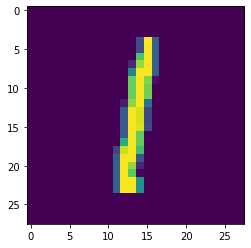

In [5]:
import matplotlib.pyplot as plt
image_index = 10006
print(y_train[image_index]) # Broj 1
plt.imshow(x_train[image_index])

In [6]:
x_train.shape #MNIST sadrži 60000 brojeva dimenzija 28x28

(60000, 28, 28)

In [7]:
# Potreban nam je niz sa 4 dimenzije kako bismo koristili Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Potrebne su nam decimalne vrijednosti
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normaliziranje tako što dijelimo x_train i x_test sa 255
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Potrebno je importovati Keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Kreiramo sekvencijalni model kojem sami dodajemo slojeve
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2031 - accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0850 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0363 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0272 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0209 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0222 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [10]:
#evaluacija modela
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0581 - accuracy: 0.9858


[0.05811348184943199, 0.98580002784729]

6


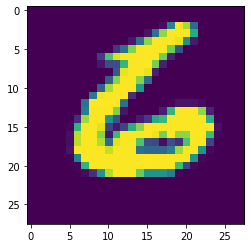

In [15]:
#Predikcija 
image_index = 9999
plt.imshow(x_test[image_index].reshape(28, 28))
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())